# Исследование данных о российском кинопрокате
Заказчик этого исследования — Министерство культуры Российской Федерации. В нашем распоряжении данные, опубликованные на портале открытых данных Министерства культуры.
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Проанализируем данные о фильмах, которые получили государственную поддержку. Узнаем, насколько такие фильмы интересны зрителю.
Представленные данные содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.


В ходе исследования мы:

- Изучим общую информацию
- Проведем предобработку данных ( устраним пропущенные значения. приведем в соответсвия типы данных, удалим дубликаты)
- Добавим в таблицу новые столбцы, необходимые для исследования
- Проведем исследовательский анализ данных. (Изучим сколько выходило фильмов в год, как менялась динамика проката, влияют ли возрастные ограничения на прокат фильмов, проанализируем  фильмы, которым была оказана государственная поддержка)


Описание данных:


Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- *title* — название фильма;
- *puNumber* — номер прокатного удостоверения;
- *show_start_date* — дата премьеры фильма;
- *type* — тип фильма;
- *film_studio* — студия-производитель;
- *production_country* — страна-производитель;
- *director* — режиссёр;
- *producer* — продюсер;
- *age_restriction* — возрастная категория;
- *refundable_support* — объём возвратных средств государственной поддержки;
- *nonrefundable_support* — объём невозвратных средств государственной поддержки;
- *financing_source* — источник государственного финансирования;
- *budget* — общий бюджет фильма;
- *ratings* — рейтинг фильма на КиноПоиске;
- *genres* — жанр фильма.


Столбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.


Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.
- *puNumber* — номер прокатного удостоверения;
- *box_office* — сборы в рублях.




###  Откроем файлы с данными и объедините их в один датафрейм. 


#### Импортируем библиотеки. Считаем данные из csv-файлов в датафреймы и сохраним в переменные `movies` ,  `shows`.Выведем общую информацию о файлах.

In [188]:
import pandas as pd
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:.2f}'.format

In [189]:
movies = pd.read_csv('mkrf_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [190]:
shows = pd.read_csv('mkrf_shows.csv')
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


#### Объединим данные таким образом, чтобы все объекты из датасета movies обязательно вошли в получившийся датафрейм.

Данные файлы содержат общий столбец **puNumber**. Мы можем объеденить данные файлы, но перед этим мы должны привести тип данных этого столбца к одинаковому в обеих таблицах. 

В таблице **movies** тип данных в столбце - object, при попытке поменять его на int c помощью метода astype(), выдает ошибку о наличии значения 'нет' в столбце. Выведем данную строку и проанализируем возможность ее удаления.

In [191]:
movies[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
movies.query('"М.Галицкая" in producer')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Данный фильм имеет дубликат, поэтому удалим строку с значением 'нет' в столбце **'puNumber'**, поменяем тип данных на **int**.

In [193]:
movies = movies[movies['puNumber'] != 'нет']

movies['puNumber'] = movies['puNumber'].astype('int')

Соединим таблицы в один Датафрейм.

In [194]:
movies_new = movies.merge(shows, on='puNumber', how='outer')
movies_new

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем общую информацию по новой таблице и проверим чтобы все строки из двух таблиц вошли в новый датафрейм.

In [195]:
movies_new.info()
print('')
print('Количество строк в таблице movies равно:', movies.shape[0])
# для сравнения выведем колтичество строк из первоначальной таблицы
print('Количество значений в стобце box_office в таблице shows равно:', len(shows['box_office']))
# и количество значений в столбце box_office таблицы shows


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Все 3158 строк по столбцу **box_office** вошли в обновленную таблицу. Общее число строк совпадает с числом строк в таблице movies. Все данные перенесены в новую таблицу при соединении. 

###  Предобработка данных

####  Проверим типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [196]:
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- В столбце **ratings** тип данных object , преобразуем его в числовой тип, но перед этим обработаем аномальные значения.

In [197]:
movies_new['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце присутствуют значения по 10ти бальной шкале и процентной оценке. Процентную оценку мы не можем привести к 10бальной, так как она ей не соответствует. Таких значений в таблице всего 29шт, это менее 1%, поэтому  заменим значения с процентом на NAN, при изменении типа данных остальных значений.

In [198]:
movies_new['ratings'] = pd.to_numeric(movies_new['ratings'], errors='coerce') #меняем тип данных на float

- Переведем строковый тип данных в дату в столбце **show_start_date**. Это поможет нам при дальнейшем анализе и преобразовании даты для новый столбцов.

In [199]:
movies_new['show_start_date'] = pd.to_datetime(movies_new['show_start_date'], format='%Y-%m-%dT%H:%M:%S').dt.tz_localize(None)

####  Изучим пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [200]:
movies_new.isna().sum()# выведем количество пропущенных значений в столбцах

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

- В столбцах *'film_studio' , 'production_country' , 'director' , 'producer' , 'genres'* есть случайные пропущенные значения, сложно назвать природу их возникновения. В столбце *financing_source* пропуски не случайные, они  возникли , так как данные в этом столбце указаны только для фильмов с гос поддержкой, пропущенные значения у фильмов без спонсирования от государства. Заполним пропуски техническим значением **unknow**.

In [201]:
# создадим список с наименованиями столбцов, в которых необходимо произвести замену
change_pass = ['film_studio', 'production_country', 'director', 'producer', 'genres', 'financing_source']

#заменим все NAN  на unknow в данных столбцах с помощью цикла
for index in change_pass:
    movies_new[index] = movies_new[index].fillna('unknow')

- В описании данных в таблицах сказано, что данные в столбце **budget** заполнены только для фильмов, имеющих гос поддержку. Пропуски в столбцах *budget , nonrefundable_support , refundable_support* у тех фильмов, которые не получали финансирования со стороны государства. Оставим пропуски в этих столбцах без изменения и будем считать наличия значения NAN как показатель отсутствия финансовой помощи от государства.

- Пропуски в столбцах **ratings** и  **box_office** вероятнее всего появились из-за отсутствия данных по ним. Они являются количественные значениями и требуют заполнения пропусков числовыми значениями. По каждому фильму эти столбцы имеют уникальные показатели, поэтому заполнить средним или медианой считаю не целесообразным. Оставим данные пропуски без изменений.

####  Изучим дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

- Проверим нашу таблицу на наличие явных дубликатов. Выведем количество явных дубликатов.

In [202]:
movies_new.duplicated().sum()

0

Значение равно 0. В таблице нет явных дубликатов.

В таблице **movies_new** есть два столбца, которые должны содержать только уникальные значения.Это *puNumber и puNumber*


- Проанализируем уникальные значения в столбце **title**

In [203]:
movies_new['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

В названиях фильмов встречаются знаки препинания в конце наименований. Удалим эти точки.

In [204]:
movies_new['title'] = movies_new['title'].str.strip('.')

Сгруппируем данные по наименованию фильмов и посмотрим какое количество дубликатов

In [205]:
movies_new.value_counts('title').head()

title
День святого Валентина_                                        5
Кошки против собак: Месть Китти Галор                          4
Форсаж 7                                                       4
Начало_                                                        4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
dtype: int64

Так как у одного фильма может быть несколько прокатных удостоверений, то в таблице встречаются дубликаты по наименованию картины, удалим строки с повторяющимися значениями.

In [206]:
movies_new = movies_new.sort_values(by = 'box_office', ascending = False).drop_duplicates(subset=['title'])


- Проверим есть ли скрытые дубликаты по столбцу **puNumber**

In [207]:
movies_new.value_counts('puNumber').head()

puNumber
1811096      1
121024817    1
121025115    1
121025114    1
121025113    1
dtype: int64

После удаления неявных дубликатов в **title**, в столбце **puNumber** неявных дубликатов не осталось.

#### Изучим категориальные значения

- Выведем число уникальных значений в категориальных столбцах и проанализируем их.

In [208]:
#создадим список с названиями категориальных столбцов
columns_category=['type', 'producer', 'film_studio', 'production_country', 
                  'director', 'age_restriction', 'financing_source','genres']
for index in columns_category:
    print('Число уникальных значений в столбце', index, ':', len(movies_new[index].unique()))

Число уникальных значений в столбце type : 8
Число уникальных значений в столбце producer : 5286
Число уникальных значений в столбце film_studio : 5424
Число уникальных значений в столбце production_country : 942
Число уникальных значений в столбце director : 4776
Число уникальных значений в столбце age_restriction : 5
Число уникальных значений в столбце financing_source : 4
Число уникальных значений в столбце genres : 743


Категориальные столбцы необходимы в аналитике для категоризации и анализа показателей по сформированным категориям. Столбцы type , age_restriction, financing_source имеют приемлемое количество уникальных значений( не более 8), по ним реально будем сформировать данные и проводить анализ. В остальных столбцах число уникальных значений превышает 700 шт. В столбце film_studio уникальных значений 5442. Это связано с тем, что над одним фильмом могли работать несколько стран, продюссеров и режиссеров, студий и тд. Анализ по таким категориям бесполезен. Поэтому для категоризации необходимо будет выделить из всего  значения основное(первое). Так в дальнейшем исследовании мы выделим главного режиссера и основной жанр картины.

- В датафрейме есть категориальные столбцы в значениях которых в начале или в конце есть пробелы, устраним их.

In [209]:
change_category = ['type', 'producer', 'film_studio', 'production_country', 'director']
#создадим список с названиями столбцов, в которых нужно убрать пробелы

for index in change_category:
    movies_new[index] = movies_new[index].str.strip()

####  Проверим количественные значения

- Рассмотрим столбец budget. Выделяются значения равные 0. Проанализируем их.

In [210]:
movies_new[movies_new['budget'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
5672,Селфи,111012117,2018-02-01 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,20000000.00,40000000.00,0.00,Фонд кино,5.80,"триллер,драма",225196400.03
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
6822,Большое путешествие,114002419,2019-04-20 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000000.00,120000000.00,0.00,Фонд кино,6.20,"мультфильм,комедия,приключения",147606826.51
5805,Два хвоста,114001018,2018-05-31 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,10000000.00,60000000.00,0.00,Фонд кино,5.00,"мультфильм,детский",106514301.03
6007,Принцесса и дракон,114003018,2018-08-23 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,40000000.00,40000000.00,0.00,Фонд кино,5.20,"мультфильм,фэнтези,детский",83366328.66
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00


В таблице 17 фильмов с значением 0 в столбце Бюджет, но значения в столбцах с объёмом возвратных и невозвратных средств государственной поддержки заполнены, значит бюджетные средства выделялись. Возможно общий бюджет данных фильмов не публичная информация. Заполнить данные значения суммой из столбцов refundable_support и  nunrefundable_support, считаю некорректным, тк при анализе даст ложный результат о доле гос поддержки от общего бюджета. Оставить данные в исходном виде так же не стоит, тк будет невозможен анализ результатов с нулевым бюджетом. В исходных данных 327 фильмов с гос поддеркжой, аномальные данные составляют 5%, считаю необходимым очистить датафрейм от аномальных данных.

In [211]:
movies_new = movies_new[movies_new['budget'] != 0]

- Проанализируем столбцы с количественными значениями и проверим их на наличие аномальных значений

Общий бюджет:

In [212]:
movies_new['budget'].describe()# посмотрим характеристики распределения в столбце budget

count          313.00
mean     131735130.80
std      186219503.52
min       14462464.00
25%       46153846.00
50%       73379554.00
75%      150000000.00
max     2305074303.00
Name: budget, dtype: float64

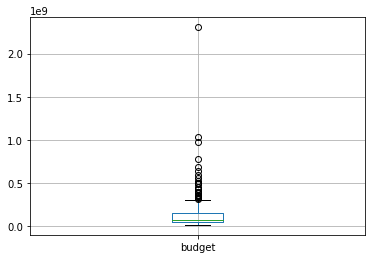

In [213]:
movies_new.boxplot('budget');

Среднее и медианное значения различаются почти в 2 раза, значит в стобце присутствуют аномальные показатели, по диаграмме размаза видим, что существует аномально большие значения. Есть несколько выбросов в бюджетом более 1млр руб. При дальнейшем исследовании средних и медианных значений стоит очистить данные от выброса для более точного анализа.

Объём возвратных средств государственной поддержки:

In [214]:
movies_new['refundable_support'].describe()

count         313.00
mean     11334355.01
std      24728011.29
min             0.00
25%             0.00
50%             0.00
75%      10000000.00
max     180000000.00
Name: refundable_support, dtype: float64

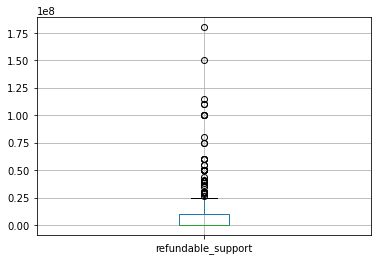

In [215]:
movies_new.boxplot('refundable_support');

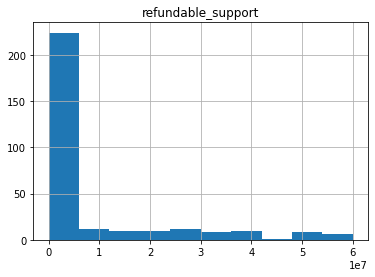

In [216]:
movies_new.hist('refundable_support', range=(0,60000000));

Более 50% значений в столбце равны нулю. А среднее значение равное 10793760 руб. по столбцу практически равно третьему квартилю. Всего 25% фильмов имеют более 10000000 руб. возвратных средств государственной поддержки.

Объём невозвратных средств государственной поддержки:

In [217]:
movies_new['nonrefundable_support'].describe()

count         313.00
mean     47040635.29
std      56659163.96
min             0.00
25%      25000000.00
50%      30000000.00
75%      40000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

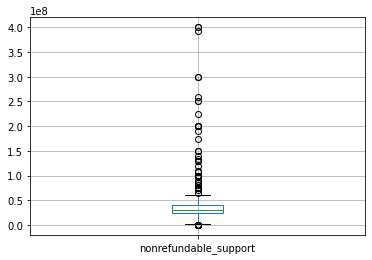

In [218]:
movies_new.boxplot('nonrefundable_support');

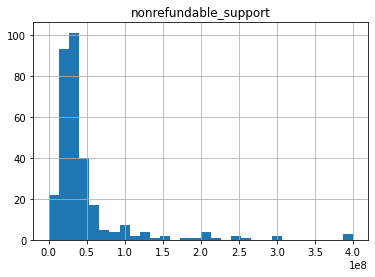

In [219]:
movies_new.hist('nonrefundable_support', bins=30);

По данному столбцу медиана и среднее  более близки к одинаковому значению, но имеются выбросы, так есть несколько фильмов с аномально большим объёмом невозвратных средств государственной поддержки, превыщающей 300 млн руб. Более 130 фильмов имеют 25 млн рублей невозвратных средств.

Рейтинг фильма на КиноПоиске:

In [220]:
movies_new['ratings'].describe()

count   5722.00
mean       6.45
std        1.11
min        1.00
25%        5.80
50%        6.60
75%        7.20
max        9.20
Name: ratings, dtype: float64

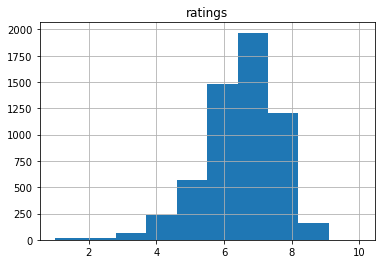

In [221]:
movies_new.hist('ratings', range=(1,10));

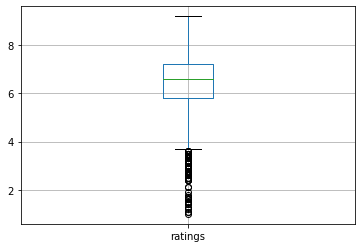

In [222]:
movies_new.boxplot('ratings');

Почти 2000 получили оценку в районе 7 баллов. Максимальные десять баллов не получил ни один фильм.Так же редкие фильмы получают оценку более 8ми баллов. В данных встречаются аномально низкие зачение рейтинга, ниже 3,8 баллов.

Сборы с проката в рублях:

In [223]:
movies_new['box_office'].describe()

count         3104.00
mean      76909012.83
std      241536008.43
min              0.00
25%         102406.25
50%        2402285.00
75%       23989289.27
max     3073568690.79
Name: box_office, dtype: float64

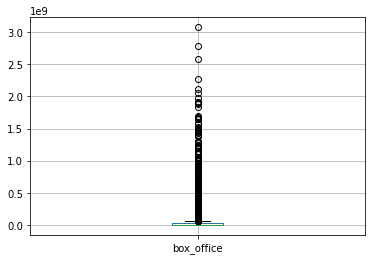

In [224]:
movies_new.boxplot('box_office');

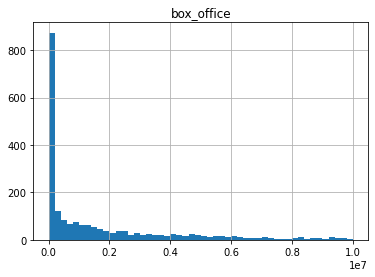

In [225]:
movies_new.hist('box_office', bins=50, range=(0,10000000));

Разброс значений в данном столбце слишком большой. Так 25% фильмов не набрали и 130 000 рублей. В то же время встречаются аномально большие значения, шесть фильмов собрали более 2 млрд рублей.



**По всем количественным столбцам можно сделать вывод что в каждом из них встречаются аномально большие или малые значения. Этот факт необходимо учесть в дальнейшем исследовании и при анализе средних показателей избавляться от аномальных значений и выбросов.**

####  Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [226]:
movies_new['years_show'] = movies_new['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [227]:
#создадим функцию, которая: 
def clean(name):
    split_name = name.split(',') #разделит в каждой ячейке слова запятой и к каждому слову станет можно обратиться по индексу
    split = split_name[0] #сохранит первое значение в ячейке в переменную
    return split          #вернет эту переменную в новый столбец соответственно

In [228]:
# применим функцию к столбцу director и сохраним в новый столбцец имя главного режиссера
movies_new['main_director'] = movies_new['director'].apply(clean) 

# применим функцию к столбцу genres и сохраним в новый столбцец основной жанр фильма
movies_new['main_genres'] = movies_new['genres'].apply(clean)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

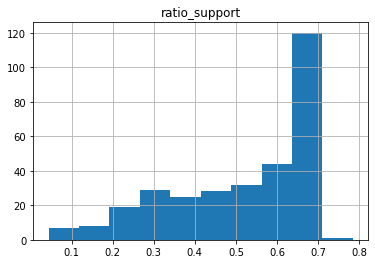

In [229]:
movies_new['ratio_support'] = (movies_new['refundable_support'] + movies_new['nonrefundable_support']) / movies_new['budget']

movies_new.hist('ratio_support');

У Основой части фильмов  65%-70% средств это средства выделенные государством.

- Добавим столбец с общей суммой государственной поддержки

In [230]:
movies_new['total_support'] = movies_new['refundable_support'] + movies_new['nonrefundable_support']

- Создадим столбец **profit**, в котором отразим прибыльность фильмов.

In [231]:
#рассчитаем разность между доходами и расходами
movies_new['profit'] = movies_new['box_office'] - movies_new['budget']

### Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Создадим новый столбец **box**, в котором будет отражены информации о наличии значений о прокате.

In [232]:
movies_new['box'] = movies_new['box_office'] > 0

С помощью сводной таблицы сгруппируем данные о количестве фильмов вышедших в прокат за каждый год.

,Всего фильмов,Количество фильмов в прокате,Доля фильмов в прокате
years_show,,,
2010,756,97,0.13
2011,472,105,0.22
2012,520,123,0.24
2013,585,177,0.30
2014,725,267,0.37
2015,662,452,0.68
2016,726,507,0.70
2017,495,354,0.72
2018,872,471,0.54


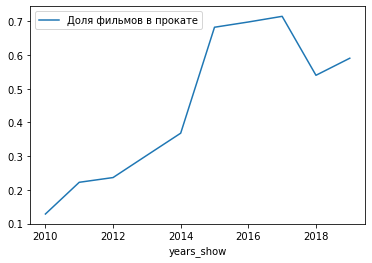

In [233]:
df = movies_new.pivot_table(index='years_show', values='box', aggfunc=['count','sum','mean'])
df.columns = ['Всего фильмов', 'Количество фильмов в прокате', 'Доля фильмов в прокате']
display(df)
df.plot(y='Доля фильмов в прокате', kind='line');

Максимальная доля фильмов, с указанной информацией о прокате в кинотеатрах была в 2017 году и составила 72%, но в этот год вышло почти самое минимальное количество фильмов- 495 картин. Больше всего картин вышло в 2018 , 2019 годах, доля с информацией о собранных средствах в прокате превышает 50%. Минимальная информация о прокате в кинотеатре указана за 2010-2012 года, информация о прокате в кино не превышает 24%.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

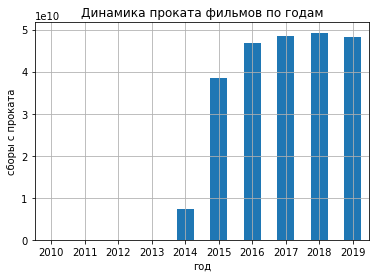

In [234]:
(movies_new
           .pivot_table(index='years_show', values='box_office', aggfunc='sum')
           .plot(y='box_office', kind='bar',grid = True,  legend=False)
);
plt.title('Динамика проката фильмов по годам');
plt.xlabel('год');
plt.ylabel('сборы с проката');
plt.xticks(rotation = 'horizontal');

Минимальная сумма сборов была в 2010 году и составила всего 2,4 млн. рублей. В 2010-2012 года динамика практически не менялась, в 2014 году сумма сбора увеличилась в несколько раз, в 2015 можно наблюдать так же резкий скачок суммы, она достигла 38 млрд рублей. С 2017 по 2019 можно уже наблюдать плавный рост сумм сбора средств.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [235]:
movies_new.pivot_table(index='years_show', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
years_show,,
2010,24020.34,1710.00
2011,133638.29,2905.00
2012,54339.24,5660.00
2013,163676.55,3522.50
2014,27233335.58,20220.00
2015,84634198.64,4808555.10
2016,92011654.55,4341120.75
2017,136886263.26,9943877.50


Средняя и медианная сумма сборов имеют совершенно разные значения.Среднее арифметическое набора данных находится суммированием всех чисел в выборке и делением полученной суммы на количество чисел. Медиана — это число, которое окажется строго по центру списка чисел в наборе данных, если их предварительно упорядочить по возрастанию. Из определения среднего и медианы, можно сделать вывод, что в наших данных есть аномально большие или малые значения. 


В данных представлены совершенно разные фильмы по целевым критериям. Есть фильмы, которые были в прокате лишь на закрытых показах и сумма их сбора не может сравниться с мировыми картинами, идущими в кино во всех странах.

Так в датафрейме есть 24 фильма, сборы которых равны нулю. В 2019 году есть два аномально больших значения столбца по фильмам "Холоп" и "Мстители", сумма их сборов составила более 2,5 млрд. рублей, что сильно влияет на статистику и среднее значение. Для объективной оценки средней суммы сборов по годам лучше избавляться от таких значений.





- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Рассчитаем сколько в среднем собирал фильм с проката в каждой  возрастной категории за каждый год начиная с 2015г. 

Пострим для наглядности гистогроаммы для каждого года.

In [236]:
#Для наглядности создадим столбец с сокращенными наименованиеями возрастных категорий
#создадим функцию, которая: 
def restriction(age):
    split_age = age.split(' ') #разделит в каждой ячейке слова пробелом и к каждому слову станет можно обратиться по индексу
    split_a = split_age[0] #сохранит первое значение в ячейке в переменную
    return split_a 

movies_new['age'] = movies_new['age_restriction'].apply(restriction) #применим функцию к столбцу с категориями по по возрасту

In [237]:
age = (movies_new
                 .query('years_show >= 2015')
                 .pivot_table(index='age', columns='years_show', values='box_office', aggfunc='mean')
      )       
age

years_show,2015,2016,2017,2018,2019
age,,,,,
«0+»,10244678.33,4055033.13,76532976.67,6489800.42,5915355.61
«12+»,186382077.37,141148577.27,191498235.63,212944651.65,150949225.14
«16+»,65741455.50,93751863.29,155788257.93,105021973.85,71648421.26
«18+»,41623747.63,45596811.20,66103325.50,48939025.15,55613303.85
«6+»,163794458.08,182623363.76,273432593.89,152519373.76,158811772.80


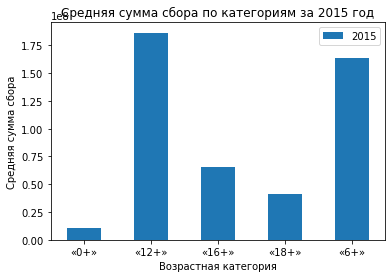

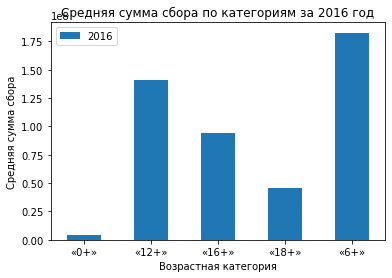

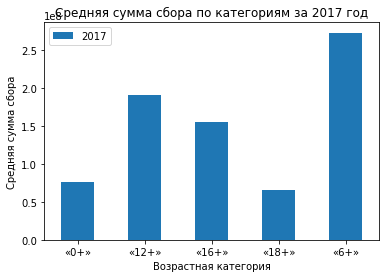

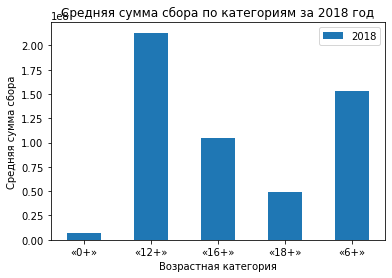

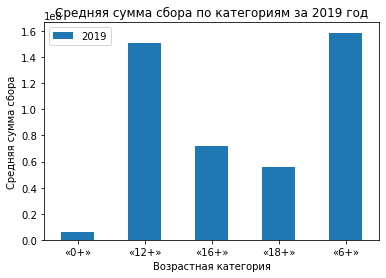

In [238]:
columns = age.columns # создадим список с названиями столбцов

# для каждого года с помощью цикла построим гистограммы
for column in columns:
    age.plot(y=column, kind='bar')
    plt.title(f'Средняя сумма сбора по категориям за {column} год')
    plt.xlabel('Возрастная категория')
    plt.ylabel('Средняя сумма сбора')
    plt.xticks(rotation = 'horizontal')

На протяжении всего рассматриваемого периода с 2015 года по 2019 год самый минимальный средний сбор показывает фильмы с возрастным ограничением 0+. Лишь в 2017 году средний сбор с проката фильма 0+ увеличился вдвое и достиг 76 млн.руб.

Лидирующие позиции почти во все года занимают фильмы категории 6+, сборы в 2017 году составили более 273 млн. рублей.
Можно сделать вывод, что возрастная категория влияет на сборы от проката фильмов, так категория 6+ в среднем собирает в два раза больше средств, чем 18+.Категории 12+ и 6+ более востребованы у зрителя. Возрастное ограничение 0+ занимает последние позиции в рейтинге сбора средств с проката.

Выведем в сводной таблицы суммы сборов для каждой категории по годам

In [239]:
year = (movies_new
                  .query('years_show >= 2015')
                  .pivot_table(index='age', columns='years_show', values='box_office', aggfunc='sum')
       )
year.columns = ['2015', '2016', '2017', '2018', '2019']
year['total'] = year[['2015', '2016', '2017', '2018', '2019']].sum(axis=1)
year

,2015,2016,2017,2018,2019,total
age,,,,,,
«0+»,379053098.37,150036225.67,229598930.00,32449002.11,17746066.82,808883322.97
«12+»,13419509570.51,11150737603.96,7851427660.67,14267291660.69,12679734911.67,59368701407.50
«16+»,10781598701.27,16594079802.74,18694590951.06,16278405946.93,12753418984.60,75102094386.60
«18+»,5411087191.93,6793924868.87,9651085523.02,8760085501.15,10121621300.13,40737804385.10
«6+»,8517311820.01,12053142008.24,12031034131.00,9913759294.32,12704941824.35,55220189077.92


Фильмы с возрастным ограничением 16+ собрали наибольшее количество средств. Минимальное количество средств ежегодно собирают фильмы 0+,связано это и в том числе с тем, что картин данной категории выходит на порядок меньше, чем остальных.

### Исследуем фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для удобства создадим таблицу, в которую входят только фильмы получившие гос поддержку.

In [240]:
movie_support = movies_new[(movies_new['budget'] > 0)]
movie_support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,years_show,main_director,main_genres,ratio_support,total_support,profit,box,age
7455,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,...,комедия,3073568690.79,2019,К.Шипенко,комедия,0.38,60000000.00,2913568690.79,True,«12+»
5652,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,"спорт,драма",2779686144.00,2017,А.Мегердичев,спорт,0.68,400000000.00,2189493953.00,True,«6+»
6548,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.00,...,"драма,военный,боевик",2271754004.52,2018,А.Сидоров,драма,0.32,180000000.00,1707969287.52,True,«12+»
5504,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.00,...,"комедия,фэнтези,приключения",1655037688.00,2017,Д.Дьяченко,комедия,0.28,100000000.00,1302560113.00,True,«12+»
5707,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.00,...,unknow,1445731797.89,2018,О.Трофим,unknow,0.57,85000000.00,1297146575.89,True,«12+»
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,...,семейный,NaN,2019,А.Попова,семейный,0.09,3000000.00,NaN,False,«0+»
7228,На Луне,111015519,2019-11-01 12:00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,...,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,0.60,35000000.00,NaN,False,«16+»
7343,Кроличья лапа,111018919,2019-11-20 12:00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.00,...,unknow,NaN,2019,Н.Джорджадзе,unknow,0.63,30000000.00,NaN,False,«16+»
7475,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,драма,NaN,2019,И.Северов,драма,0.65,30000000.00,NaN,False,«12+»


- Проанализируем столбец **total_support**, в котором отражена общая сумма государственной поддержки

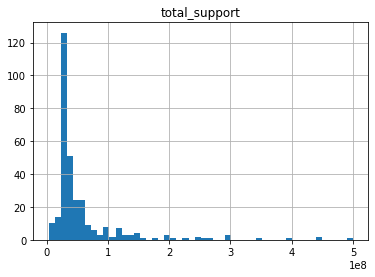

In [241]:
movie_support.hist('total_support', bins=50);

Половина фильмов из представленных данных получили государственную поддержку в размере 35 млн. рублей. Есть выдающие значения в данных. Так картина 'Союз спасения' получила от государства 500 млн. рублей.

- Проанализируем столбец **profit**, в котором отражена информация о прибыльности фильмов.

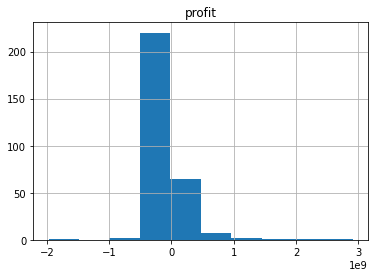

In [242]:
movie_support.hist('profit');

Из гистрограммы видно, что более 200 фильмов были убыточными. Всего 66 фильмов имели прибыль после проката каритины в кинотеатрах.

In [243]:
print(movie_support['profit'].corr(movie_support['ratings']))
movie_support['budget'].corr(movie_support['ratings'])

0.10140242054195904


0.10907497700095874

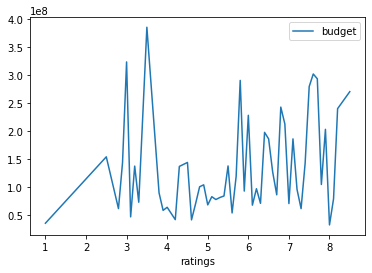

In [244]:
(movie_support
              .pivot_table(index='ratings', values='budget')
              .plot(y='budget', kind='line')
);

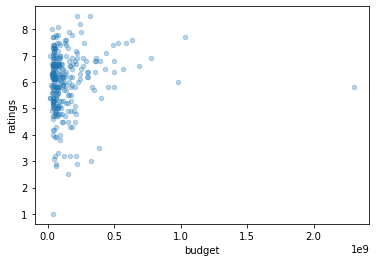

In [245]:
movie_support.plot(x='budget', y='ratings', kind='scatter', alpha=0.3);

Коэффициент корреляции показывает, что зависимости рейтинга от окупаемости и бюджета  картины нет. Как высокий так и низкий рейтинг получают картины похожими бюджетами.

- Проанализируем на какой жанр выделяется больше денежных средств.

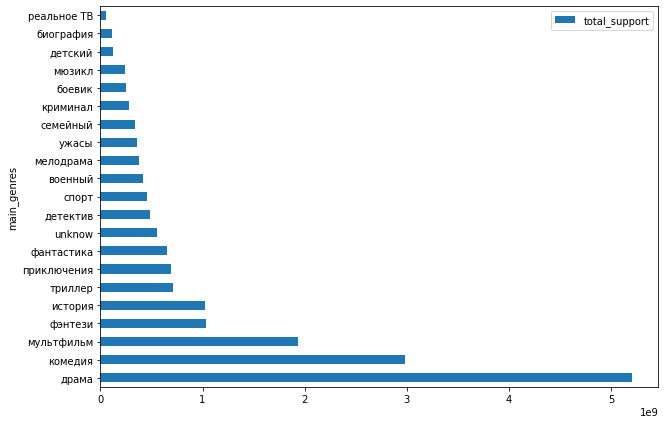

In [246]:
(movie_support
                     .pivot_table(index='main_genres', values='total_support', aggfunc='sum')
                     .sort_values('total_support', ascending=False)
                     .plot(y='total_support', kind='barh', figsize = (10, 7))
);

На фильмы с жанром драма выделялось более 5 млрд рублей за рассматриваемое десятилетие. В два раза меньше спонсировались фильмы жанра комедия. Минимальные инвестиции были в жанры реальное ТВ  и составили 53 млн руб. 

- Проанализируем рейтинг по жанрам

Проверим количество фильмов по каждому жанру.

In [247]:
movie_support.value_counts('main_genres').head(10)

main_genres
драма         91
комедия       68
мультфильм    26
unknow        15
триллер       14
мелодрама     14
фэнтези       11
ужасы         10
военный        9
фантастика     9
dtype: int64

Для правдопободного анализа средней оценки фильма, возьмем данные ,где количество картин более 10 штук в жанре.

In [248]:
top_genres = movie_support.value_counts('main_genres').head(8).index

max_sup = movie_support.query('main_genres in @top_genres')

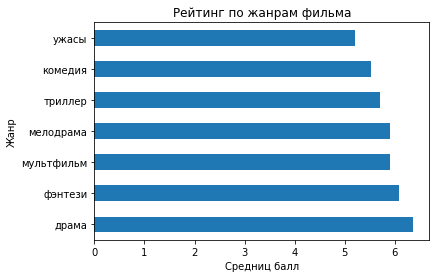

In [68]:
(max_sup
             .pivot_table(index='main_genres', values='ratings')
             .sort_values('ratings', ascending=False)
             .plot(y='ratings', kind='barh', legend=False)
);
plt.title('Рейтинг по жанрам фильма');
plt.xlabel('Средний балл');
plt.ylabel('Жанр');


Наивысшую оценку, превышающую 6,2 получают фильмы жанра драма. У ужастиков средняя оценка ниже, чем у остальных фильмов и равна в среднем 5,2 балла.

- Проанализируем средние суммы сборов по жанрам фильмов с гос поддержкой

Ранее мы рассматривали столбец **box_office** и говорили, что в нем встречаются аномально большие значения, удля анализа удалим их и посмотрим среднии суммы сбора по жанрам. Так же будем рассматривать жанры, у которых число картин больше 10.

In [69]:
(max_sup
        .query('box_office < 1000000000')
        .pivot_table(index='main_genres', values='box_office').sort_values('box_office',ascending=False)
)

,box_office
main_genres,
мультфильм,201797244.49
комедия,114968348.41
фэнтези,90530600.72
ужасы,71012318.94
драма,64701941.42
триллер,33946699.29
мелодрама,3427303.86


Показатель средней суммы сборов самый большой у мультфильмов и равен 201 млн руб за картину. Минимально собирают фильмы жанра мелодрама.

- Сравним рейтинг фильмов с государственной поддержкой и без нее.

In [70]:
#создадим столбец где True- есть поддержка, False-нет поддержки
movies_new['support'] = movies_new['total_support'] > 0

In [71]:
raiting = movies_new.pivot_table(index='support', values='ratings', aggfunc='median')
raiting.index = ['Без гос поддержки', 'С гос подддержкой']
raiting

,ratings
Без гос поддержки,6.60
С гос подддержкой,6.20


Средний рейтинг фильмов с государственной поддержкой и без практически одинаков.

- Проанализируем источники финансирования.

In [72]:
sup = movie_support.pivot_table(index='financing_source', 
                                values=['refundable_support', 'nonrefundable_support', 'total_support'], aggfunc='sum')
sup.columns = ['Невозвратные средства', 'Возвратные средства', 'Общая сумма',]

display(sup)
movie_support.value_counts('financing_source')

,Невозвратные средства,Возвратные средства,Общая сумма
financing_source,,,
Министерство культуры,4830661000.00,0.00,4830661000.00
"Министерство культуры, Фонд кино",806931354.00,318153119.00,1125084473.00
Фонд кино,9086126493.00,3229500000.00,12315626493.00


financing_source
Министерство культуры               163
Фонд кино                           130
Министерство культуры, Фонд кино     20
dtype: int64

Министерство культуры проспонсировало 163 фильма за анализируемые периоды, Фонд кино оказывает поддрежку чуть реже, за прошлое десятилетие он выделил средства для 130 картин. Так же есть фильмы, которым была оказана спонсорская помощь обеими организациями, таких 20 фильмов. Несмотря на то, что фонд кино профинансировал на 30 картин меньше, средств он выделил в разы больше. Так общая сумма гос поддержки от них составила 12 млр. рублей, в то время как министерство культуры выделило 4,8 млр. руб. Стоит обратить внимание, что министерство культуры не выделяет возвратные средства, а у Фонда кино 26% являются возвратными.

- Проанализируем как влияет возрастная категория на выделение государственной поддержки

In [73]:
age_support = movies_new.pivot_table(index='age', values='total_support', aggfunc=['sum', 'count'])
age_support.columns = ['Общая сумма', 'Количество фильмов']
age_support

,Общая сумма,Количество фильмов
age,,
«0+»,273520000.00,8
«12+»,6963394165.00,102
«16+»,5241053319.00,118
«18+»,916000000.00,26
«6+»,4877404482.00,59


На основании данных можно сделать вывод, что государство делает упор на фильмы предназначенные для подростков и дошкольников. Больше 200 фильмов с категорией 12+ и 16+ получили финансирование, а фильмов для взрослых или малышей было всего 26 и 8 соответственно. Аномально большие значения финансовой помощи так же были в возрастных категориях 12+ и 16+. Стоит обратить внимание на категорию 6+. Фильмов с гос поддержкой в этой категории было выпущено в два раза меньше , чем с категорией 16+, но средств было выделено практически одинакого. Такие показатели связаны с тем, что два фильма("Движение вверх", "Экипаж") получили аномально больше суммы гос поддержки равные 400 млн. рублей. 

- Проанализируем обьем государственной поддержки по годам.

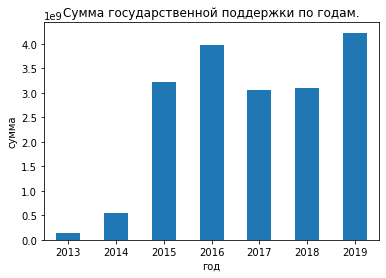

In [74]:
(movie_support
              .pivot_table(index='years_show', values='total_support', aggfunc='sum')
              .plot(y='total_support', kind='bar', legend=False)
);
plt.title('Сумма государственной поддержки по годам.');
plt.xlabel('год');
plt.ylabel('сумма');
plt.xticks(rotation = 'horizontal');

Максимальный объем государственной поддержки был оказан в 2019 году и составил 4,2 млрд. рублей. В 2016 году этот показатель был так же высок и составлял 3,9 млрд. рублей. В 2017-2018 годах был спад гос помощи и равнялся 3 млрд рублей в год. Анализируя предоставленные нам данные можно сделать вывод, что в 2010-2011 годах спонсорской помощи от государства не было, а в 2013-2014 она была в разы меньше, чем в следующие года, либо мы владеем не полными данными до 2015 года. 

- Проанализируем как связаны режиссеры и суммы гос поддержки

In [75]:
director = movie_support.pivot_table(index='main_director', values='total_support', aggfunc=['sum','count'])
director.columns = ['Сумма поддержки', 'Количество фильмов']
director.sort_values('Сумма поддержки', ascending = False).head(10)


,Сумма поддержки,Количество фильмов
main_director,,
Н.Хомерики,600000000.00,2
А.Кравчук,500000000.00,1
Р.Давлетьяров,459847945.00,5
А.Мизгирев,450000000.00,1
Н.Лебедев,442104482.00,1
А.Мегердичев,400000000.00,1
Д.Дьяченко,351000000.00,4
А.Цицилин,350000000.00,3
Д.Киселев,350000000.00,2


In [76]:
director.sort_values('Количество фильмов', ascending = False).head(10)

,Сумма поддержки,Количество фильмов
main_director,,
Р.Давлетьяров,459847945.00,5
Д.Дьяченко,351000000.00,4
С.Андреасян,325000000.00,4
С.Мокрицкий,202510000.00,3
Д.Шмидт,215000000.00,3
А.Котт,129000000.00,3
А.Цицилин,350000000.00,3
А.Аксененко,90000000.00,3
К.Шипенко,312000000.00,3


На основании сводных таблиц, можно проследить зависимость, тем режиссерам, кому помощь выделялась чаще(три и более фильма), сумма этой помощи меньше в разы, в отличии от картин, режиссерам которых выделялась помощь лишь однажды.

### Общий вывод

На основании исследовательского анализа данных, можно сделать вывод:
    
1. Максимальная доля фильмов, с указанной информацией о прокате в кинотеатрах была в 2017 году и составила 72%, но в этот год вышло почти самое минимальное количество фильмов- 495 картин. Больше всего картин вышло в 2018 , 2019 годах, доля с информацией о собранных средствах в прокате превышает 50%. Минимальная информация о прокате в кинотеатре указана за 2010-2012 года, информация о прокате в кино не превышает 24%.
2. Минимальная сумма сборов была в 2010 году и составила всего 2,4 млн. рублей. В 2010-2012 года динамика практически не менялась, в 2014 году сумма сбора увеличилась в несколько раз, в 2015 можно наблюдать так же резкий скачок суммы, она достигла 38 млрд рублей. С 2017 по 2019 можно уже наблюдать плавный рост сумм сбора средств.
3. Средняя и медианная сумма сборов имеют совершенно разные значения.В связи с тем, что в данных представлены совершенно разные фильмы по целевым критериям. Есть фильмы, которые были в прокате лишь на закрытых показах и сумма их сбора не может сравниться с мировыми картинами, идущими в кино во всех странах.
4. На протяжении всего рассматриваемого периода с 2015 года по 2019 год самый минимальный средний сбор показывает фильмы с возрастным ограничением 0+. Лишь в 2017 году средний сбор с проката фильма 0+ увеличился вдвое и достиг 76 млн.руб.
Лидирующие позиции почти во все года занимают фильмы категории 6+, сборы в 2017 году составили более 273 млн. рублей. Можно сделать вывод, что возрастная категория влияет на сборы от проката фильмов, так категория 6+ в среднем собирает в два раза больше средств, чем 18+.Категории 12+ и 6+ более востребованы у зрителя. Возрастное ограничение 0+ занимает последние позиции в рейтинге сбора средств с проката.
5. Фильмы с возрастным ограничением 16+ собрали наибольшее количество средств. Минимальное количество средст ежегодно собирают фильмы 0+,связано это и в том числе с тем, что картин данной категории выходит на порядок меньше, чем остальных.
6. Половина фильмов из представленных данных получили государственную поддержку в размере 35 млн. рублей. Есть выдающие значения в данных. Так картина 'Союз спасения' получила от государства 500 млн. рублей.
7. Более 200 фильмов были убыточными. Всего 66 фильмов имели прибыль после проката каритины в кинотеатрах.
8. Коэффициент корреляции равен 0,1 и показывает, что зависимости рейтинга от окупаемости и бюджета картины нет. Как высокий так и низкий рейтинг получают картины похожими бюджетами.
9. На фильмы с жанром драма выделялось более 5 млрд рублей  за рассматриваемое десятилетие. В два раза меньше спонсировались фильмы жанра комедия. Минимальные инвестиции были в жанры реальное ТВ и составили 53 млн руб.
10. Наивысшую оценку, превышающую 6,2 получают фильмы жанра драма. У ужастиков средняя оценка ниже, чем у остальных фильмов и равна в среднем 5,2 балла.
11. Средний рейтинг фильмов с государственной поддержкой и без практически одинаков
12. Министерство культуры проспонсировало 163 фильма за анализируемые периоды, Фонд кино оказывает поддрежку чуть реже, за прошлое десятилетие он выделил средства для 130 картин. Так же есть фильмы, которым была оказана спонсорская помощь обеими организациями, таких 20 фильмов. Несмотря на то, что фонд кино профинансировал на 30 картин меньше, средств он выделил в разы больше. Так общая сумма гос поддержки от них составила 12 млр. рублей, в то время как министерство культуры выделило 4,8 млр. руб. Стоит обратить внимание, что министерство культуры не выделяет возвратные средства, а у Фонда кино 26% являются возвратными.
13. На основании данных можно сделать вывод, что государство делает упор на фильмы предназначенные для подростков и дошкольников. Больше 200 фильмов с категорией 12+ и 16+ получили финансирование, а фильмов для взрослых или малышей было всего 26 и 8 соответственно. Аномально большие значения финансовой помощи так же были в возрастных категориях 12+ и 16+. Стоит обратить внимание на категорию 6+. Фильмов с гос поддержкой в этой категории было выпущено в два раза меньше , чем с категорией 16+, но средств было выделено практически одинакого. Такие показатели связаны с тем, что два фильма("Движение вверх", "Экипаж") получили аномально больше суммы гос поддержки равные 400 млн. рублей.
14. Максимальный объем государственной поддержки был оказан в 2019 году и составил 4,2 млрд. рублей. В 2016 году этот показатель был так же высок и составлял 3,9 млрд. рублей. В 2017-2018 годах был спад гос помощи и равнялся 3 млрд рублей в год. Анализируя предоставленные нам данные можно сделать вывод, что в 2010-2011 годах спонсорской помощи от государства не было, а в 2013-2014 она была в разы меньше, чем в следующие года, либо мы владеем не полными данными до 2015 года.
15. На основании анализа, можно проследить зависимость, тем режиссерам, кому помощь выделялась чаще(три и более фильма), сумма этой помощи меньше в разы, в отличии от картин, режиссерам которых выделялась помощь лишь однажды.
16. Показатель средней суммы сборов самый большой у мультфильмов и равен 201 млн руб за картину. Минимально собирают фильмы жанра мелодрама.


На основании проведенного исследования можно порекомендовать продолжать осуществлять поддержку фильмам жанра драма, так как картины данного жанра получают высокие оценки зрителя. Так же советуем обратить внимания и увеличить спонсорскую поддержку фильмам жанра мультфильм и комедия, так как средние суммы сборов по ним показывают наибольшие значения.
